<a href="https://colab.research.google.com/github/pcsilcan/ca/blob/master/20202/ca_20202_141_ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import math

def dfs(G, s, t):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    bottleneck = math.inf
    P = []
    P.append(s)
    while len(P) > 0:
        u = P.pop()
        if u == t: break
        if visited[u]: continue
        visited[u] = True
        for v in range(n):
            if G[u][v] > 0 and not visited[v]:
                P.append(v)
                path[v] = u
                bottleneck = G[u][v] if G[u][v] < bottleneck else bottleneck

    return path, bottleneck, path[t] != -1

def fordFulkerson(G, s, t):
    n = len(G)
    Gp = [[G[u][v] for v in range(n)] for u in range(n)]
    maxflow = 0
    while True:
        path, bottleneck, existsPath = dfs(Gp, s, t)
        if not existsPath: break
        maxflow += bottleneck
        print(path)
        end = t
        while path[end] != -1:
            u, v = path[end], end
            Gp[u][v] -= bottleneck
            Gp[v][u] += bottleneck
            end = path[end]

    return maxflow

In [8]:
V = [ 'S', 'T', 'u', 'v', 'w', 'z' ]
G = [[  0,   0,  16,   0,  13,   0], # S
     [  0,   0,   0,   0,   0,   0], # T
     [  0,   0,   0,  12,   0,   0], # u
     [  0,  20,   0,   0,   9,   0], # v
     [  0,   0,   4,   0,   0,  14], # w
     [  0,   4,   0,   7,   0,   0]] # z

In [9]:
fordFulkerson(G, 0, 1)

[-1, 3, 4, 5, 0, 4]
[-1, 3, 4, 5, 0, 4]
[-1, 5, 4, -1, 0, 4]
[-1, 3, 4, 2, 0, 4]
[-1, 3, 0, 2, 2, 4]
[-1, 3, 0, 2, 2, 4]
[-1, 3, 0, 2, 2, 4]
[-1, 3, 0, 2, 2, 4]
[-1, 3, 0, 2, 2, 4]


23

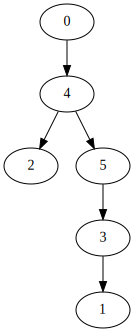

In [13]:
import graphviz as gv

path = [-1, 3, 4, 5, 0, 4]

g = gv.Digraph()

for u, v in enumerate(path):
    if v != -1:
        g.edge(str(v), str(u))

g

In [15]:
end = 1
while path[end] != -1:
    v = end
    u = path[end]
    print(u, v)
    end = path[end]


3 1
5 3
4 5
0 4
